# Deep Learning Reading Group
## Chapter 6 (part 2) - Backpropagation
### João M. Monteiro

This code was based on the following resourses:

http://lumiverse.io/series/neural-networks-demystified

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

Please read them instead, this was written as a small demonstration for the presentation, which means that the original sources are more complete.

Moreover, the implementation does not follow some good practices that should be taken into account. This is a really simple example that should be viewed as a toy example, and no more than that.

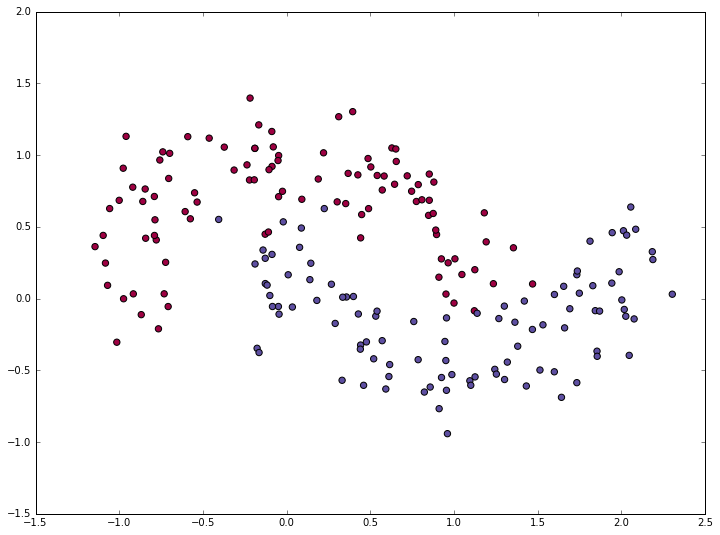

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

# Generate a dataset and plot it
np.random.seed(1)
X, y = datasets.make_moons(200, noise=0.20)
X = np.array(X)
y = (np.array(y)).reshape(len(y),1)

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# Define useful plot function

In [2]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Train with logistic regression

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


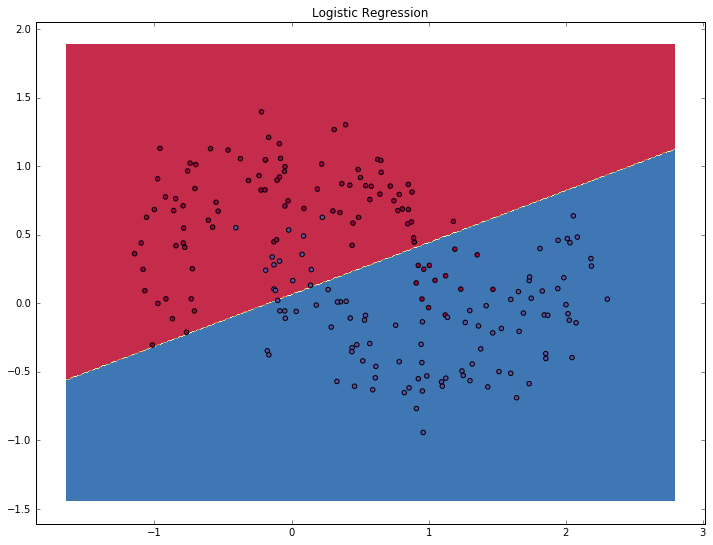

In [3]:
from sklearn import linear_model
# Train the logistic rgeression classifier
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

# Neural network (same as the one in the slides + bias term)

In [4]:
class Neural_Network(object):
    def __init__(self, dim_x):
        #Define Hyper parameters
        self.inputLayerSize = dim_x + 1 # add bias term
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        #Weights
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

        
    def forward(self, X):
        X = np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
        #Propagate inputs
        self.Z2 = np.dot(X, self.W1)
        self.A2 = self.sigmoid(self.Z2)
        self.Z3 = np.dot(self.A2, self.W2)
        self.yHat = self.sigmoid(self.Z3)
        return self.yHat
    
    
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    
    def d_sigmoid(self,z):
        s = self.sigmoid(z)
        return s*(1-s)
    
    def backward(self,X,y):
        X = np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

        delta3 = -(y-self.yHat)*self.d_sigmoid(self.Z3)
        dJdW2 = np.dot(self.A2.T, delta3)
                        
        delta2 = np.dot(delta3,self.W2.T)*self.d_sigmoid(self.Z2)
        dJdW1 = np.dot(X.T, delta2)
        
        step = 0.01
        self.W2 = self.W2 - step*dJdW2        
        self.W1 = self.W1 - step*dJdW1
        
        

In [5]:
NN = Neural_Network(2)
# Don't do this in practice! This is just to demonstrate the general shape of the decision boundary
for _ in range(1,100000):
    ind = np.random.randint(200,size=20)
    NN.forward(X[ind,:])
    NN.backward(X[ind,:],y[ind])

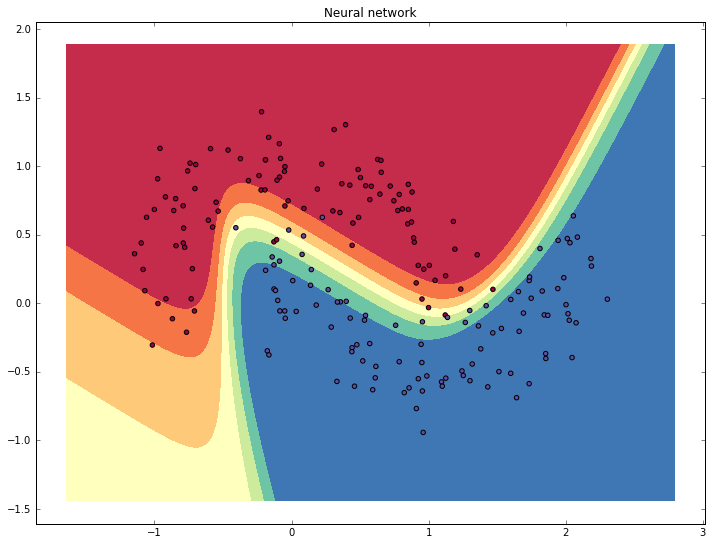

In [6]:
# Plot the decision boundary
plot_decision_boundary(lambda x: NN.forward(x))
plt.title("Neural network")